##IMPORTANDO BIBLIOTECAS


In [92]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
from sklearn.cluster import KMeans
import random

##IMPORTANDO CSV E AJUSTANDO INFORMAÇÕES DO DATAFRAME

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroansali/Analise-de-Filmes-com-K-Means/main/imdb_top_1000_csv.csv',encoding='iso8859-1')

# GÊNEROS:
# 0 - DRAMA
# 1 - CRIME
# 2 - ACTION
# 3 - BIOGRAPHY
# 4 - WESTERN
# 5 - COMEDY
# 6 - ADVENTURE
# 7 - ANIMATION
# 8 - HORROR
# 9 - MYSTERY
# 10 - FILM-NOIR
# 11 - FANTASY
# 12 - FAMILY
# 13 - THRILLER

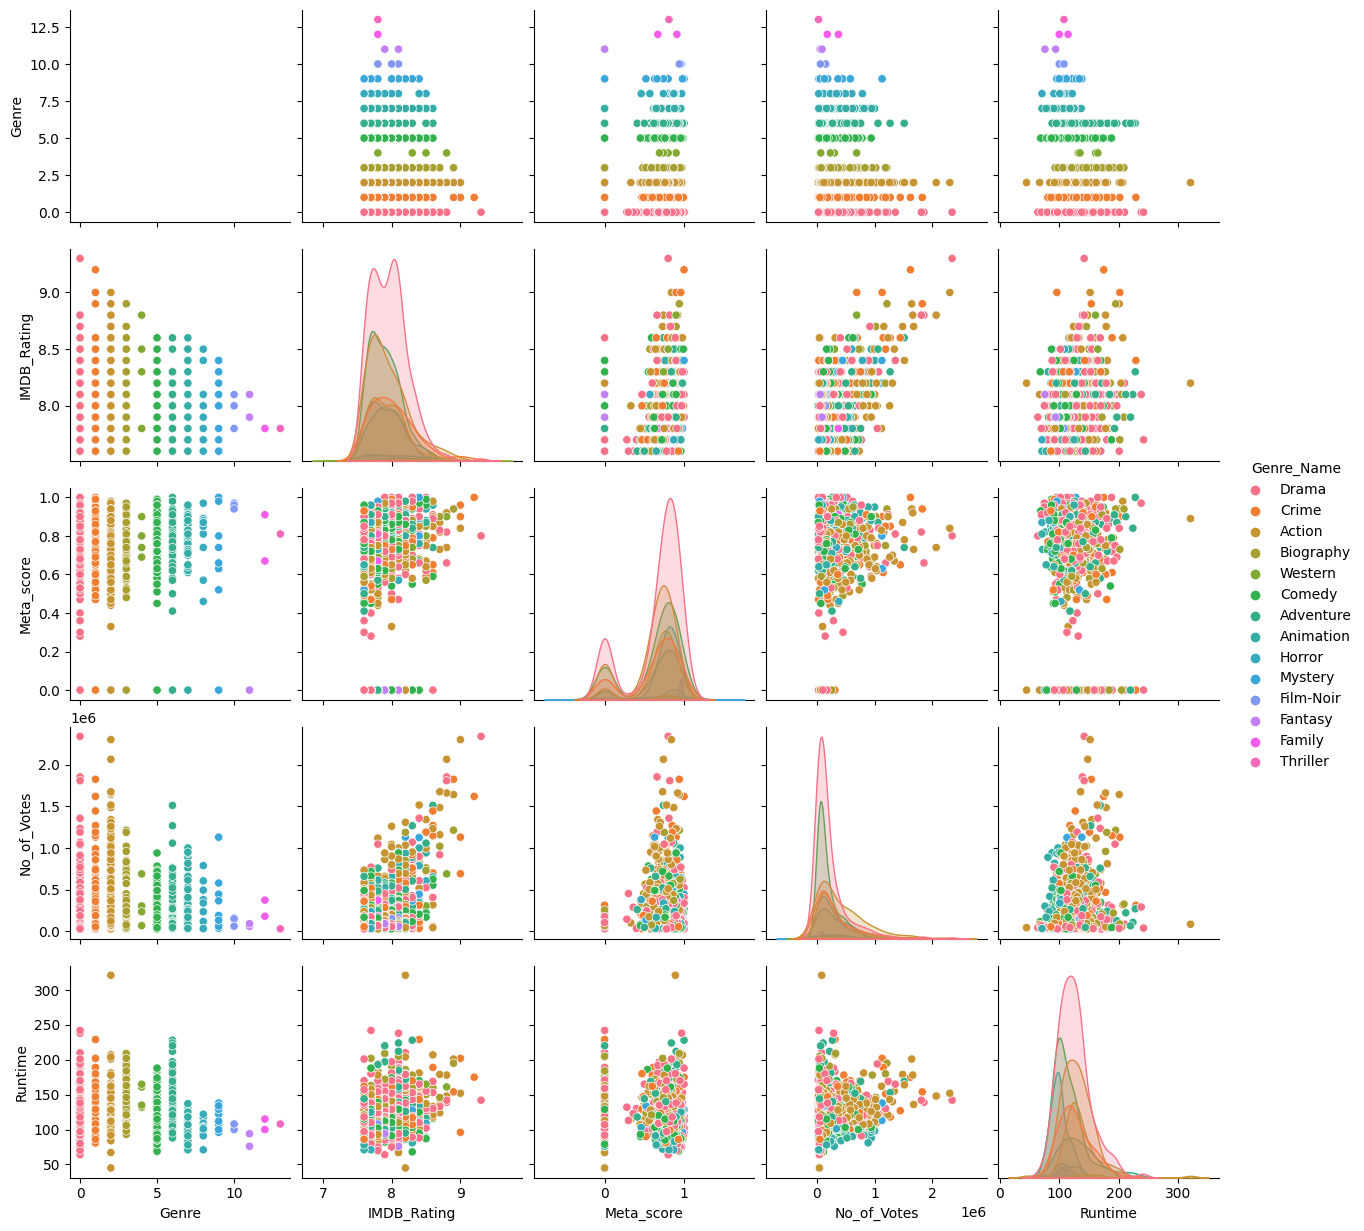

In [94]:
#EXIBE GRAFICAMENTE A DIVISÃO DOS FILMES LEVANDO EM CONSIDEERAÇÃO O FATOR GÊNERO
sb.pairplot(df,hue='Genre_Name')

In [95]:
#REMOVE STRINGS DO DATAFRAME PARA UTILIZAÇÃO DO KMEANS
X = np.array(df.drop(['Series_Title', 'Genre_Name'], axis = 1))

In [96]:
X

array([[0.000000e+00, 9.300000e+00, 8.000000e-01, 2.343110e+06,
        1.420000e+02],
       [1.000000e+00, 9.200000e+00, 1.000000e+00, 1.620367e+06,
        1.750000e+02],
       [2.000000e+00, 9.000000e+00, 8.400000e-01, 2.303232e+06,
        1.520000e+02],
       ...,
       [0.000000e+00, 7.600000e+00, 8.500000e-01, 4.337400e+04,
        1.180000e+02],
       [0.000000e+00, 7.600000e+00, 7.800000e-01, 2.647100e+04,
        9.700000e+01],
       [1.000000e+00, 7.600000e+00, 9.300000e-01, 5.185300e+04,
        8.600000e+01]])

##APLICAÇÃO DO KMEANS

In [97]:
#APLICA O KMEANS LEVANDO EM CONSIDERAÇÃO O N_CLUSTERS, QUE NESSE CASO ORIGINAL ESTÁ NA MESMA QUANTIDADE DE GÊNEROS, 
#MAS NORMALMENTE SEGUE RESULTADO DE CÁLCULO DE DISTÂNCIAS NO MÉTODO DO COTOVELO
kmeans = KMeans(n_clusters=14, random_state=0)

In [98]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14, random_state=0)

In [99]:
kmeans.labels_

array([ 5,  3,  5,  1,  8,  3, 10, 11,  5, 10,  3, 10,  8,  3, 10,  1, 11,
       12,  4,  2,  4,  3,  8,  2, 11, 11,  2,  3, 11, 11,  4,  6,  6, 12,
        8,  8, 11, 11,  8, 11,  1,  1,  1, 12,  1, 13, 13,  1, 13,  2,  9,
       13,  0,  4,  4,  4,  0,  0,  6,  8, 12,  6, 11,  3,  6,  0,  1,  6,
        9,  1,  6,  6, 12, 12,  2,  8,  4,  4,  9,  7,  0,  9,  0,  0,  9,
        4,  4,  4, 13, 13,  0,  4,  7, 11, 12,  8,  8,  8,  1, 12,  4, 12,
       12, 12,  8,  4,  2,  6,  8, 12, 13,  8, 13,  8,  2, 13, 13,  0, 13,
        6, 13,  4,  0,  0,  6,  0,  0,  7,  4,  4,  4,  6,  9,  4,  7,  7,
        4,  4,  4,  4,  7,  4,  4,  0,  9,  1, 12, 11,  7,  9,  2,  8,  1,
        7,  4, 11,  7,  6,  6, 12,  4,  9,  9,  4,  2,  9,  4,  6,  8,  4,
       13,  8,  7,  6,  7,  4,  4,  4,  9, 13, 13,  7,  4, 13,  7,  0,  4,
        0,  4,  0,  7,  7,  4,  7,  4,  4,  4,  4,  0,  7,  4,  4,  2,  6,
        0,  0,  4,  0,  4,  8, 12,  4,  9,  2,  7,  2,  9, 13,  9,  4,  4,
        4,  2, 12,  7,  8

In [100]:
#ADICIONA AO DATAFRAME A CLASSIFICAÇÃO DO KMEANS
df['Classificação KMeans'] = kmeans.labels_

In [101]:
#IMPRIME O DATAFRAME
df

,Series_Title,Genre,IMDB_Rating,Meta_score,No_of_Votes,Runtime,Genre_Name,Classificação KMeans
0,The Shawshank Redemption,0,9.3,0.80,2343110,142,Drama,5
1,The Godfather,1,9.2,1.00,1620367,175,Crime,3
2,The Dark Knight,2,9.0,0.84,2303232,152,Action,5
3,The Godfather: Part II,1,9.0,0.90,1129952,202,Crime,1
4,12 Angry Men,1,9.0,0.96,689845,96,Crime,8
...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,5,7.6,0.76,166544,115,Comedy,0
996,Giant,0,7.6,0.84,34075,201,Drama,4
997,From Here to Eternity,0,7.6,0.85,43374,118,Drama,4
998,Lifeboat,0,7.6,0.78,26471,97,Drama,4


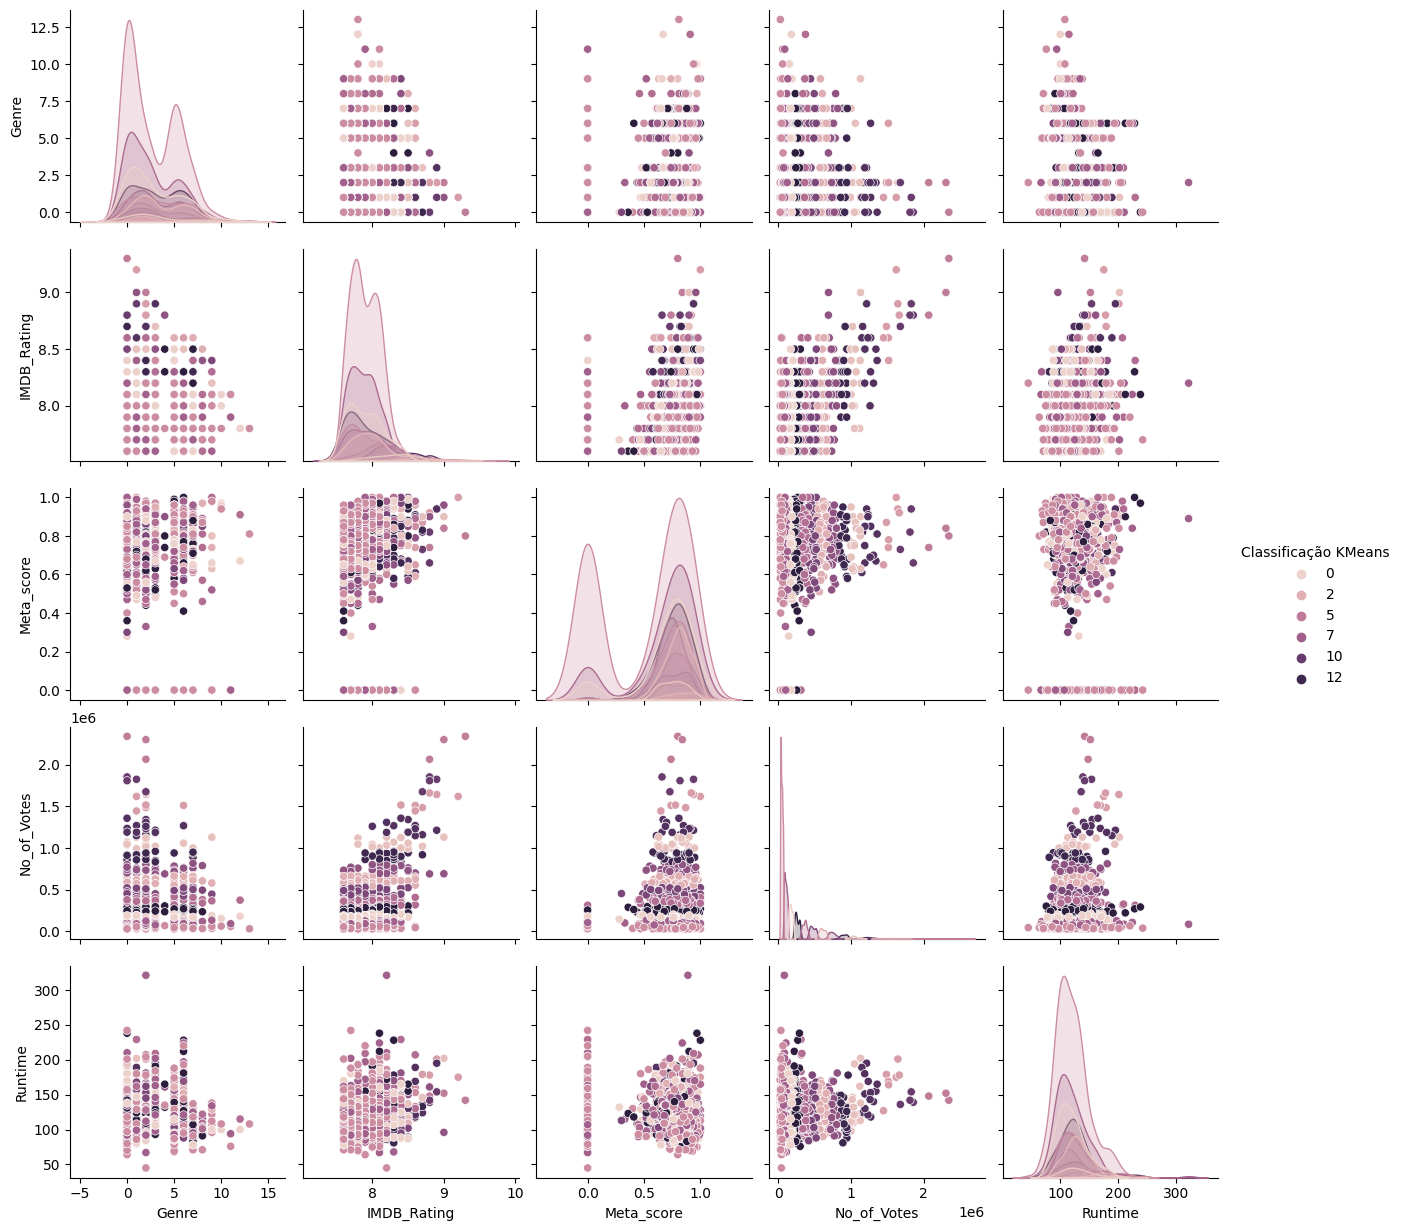

In [102]:
#IMPRIME DADOS LEVANDO EM CONSIDERAÇÃO O FATOR "CLASSIFICAÇÃO KMEANS"
sb.pairplot(df,hue='Classificação KMeans')

## Recomendação de Filmes seguindo a classificação do KMeans


In [106]:
#PEDE FILME PARA BASEAR SUA RECOMENDAÇÃO
filme1 = str(input("Digite o nome de um filme desses da lista que você goste: "))

Digite o nome de um filme desses da lista que você goste: Pulp Fiction


In [104]:
#IMPRIME COMO ESTA O DATAFRAME
df

,Series_Title,Genre,IMDB_Rating,Meta_score,No_of_Votes,Runtime,Genre_Name,Classificação KMeans
0,The Shawshank Redemption,0,9.3,0.80,2343110,142,Drama,5
1,The Godfather,1,9.2,1.00,1620367,175,Crime,3
2,The Dark Knight,2,9.0,0.84,2303232,152,Action,5
3,The Godfather: Part II,1,9.0,0.90,1129952,202,Crime,1
4,12 Angry Men,1,9.0,0.96,689845,96,Crime,8
...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,5,7.6,0.76,166544,115,Comedy,0
996,Giant,0,7.6,0.84,34075,201,Drama,4
997,From Here to Eternity,0,7.6,0.85,43374,118,Drama,4
998,Lifeboat,0,7.6,0.78,26471,97,Drama,4


In [112]:
#VARRE O DATAFRAME PARA ENCONTRAR A CLASSIFICAÇÃO DO FILME ESCOLHIDO
for index, row in df.iterrows():
    # Acessar os valores de cada coluna da linha
    coluna1_valor = row['Series_Title']
    coluna2_valor = row['Classificação KMeans']
    if coluna1_valor == filme1:
      break

#MOSTRA O FILME ESCOLHIDO E EM SEGUIDA SUGERE 3 FILMES COM A MESMA CLASSIFICAÇÃO DO KMEANS
print('Filme escolhido para gerar recomendação: ', coluna1_valor)

print('Segundo o algoritmo KMeans, 3 filmes que podem te agradar tanto quanto ', coluna1_valor, ' são: ')

#VARRE O DATAFRAME EM BUSCA DE OUTROS 3 FILMES QUE TENHAM A MESMA CLASSIFICAÇÃO KMEANS PARA RECOMENDAÇÃO
lista_recomendacao = []
for coluna, linha in df.iterrows():
    # Acessar os valores de cada coluna da linha
    coluna1_valor2 = linha['Series_Title']
    coluna2_valor2 = linha['Classificação KMeans']
    if coluna2_valor2 == coluna2_valor:
        lista_recomendacao.append(coluna1_valor2)
lista_recomendacao.remove(filme1)
filme_recomendado = random.choice(lista_recomendacao)
print('Número 1: ', filme_recomendado)
lista_recomendacao.remove(filme_recomendado)
print('------------- <3 -------------')
filme_recomendado = random.choice(lista_recomendacao)
print('Número 2: ', filme_recomendado)
lista_recomendacao.remove(filme_recomendado)
print('------------- <3 -------------')
filme_recomendado = random.choice(lista_recomendacao)
print('Número 3: ', filme_recomendado)
lista_recomendacao.remove(filme_recomendado)
print('...')
print('Caso estes não sejam de seu interesse ou já tenha visto algum, seguem outras indicações recomendadas pelo algoritmo: ')
contador = 0
for filme in lista_recomendacao:
  print(':3 ', filme)
  contador += 1
  if contador == 10:
    break
print('ESPERAMOS QUE ALGUMA INDICAÇÃO TE AGRADE! OBRIGADO ^^')






Filme escolhido para gerar recomendação:  Pulp Fiction
Segundo o algoritmo KMeans, 3 filmes que podem te agradar tanto quanto  Pulp Fiction  são: 
Número 1:  Fight Club
------------- <3 -------------
Número 2:  The Matrix
------------- <3 -------------
Número 3:  Forrest Gump
...
Caso estes não sejam de seu interesse ou já tenha visto algum, seguem outras indicações recomendadas pelo algoritmo: 
ESPERAMOS QUE ALGUMA INDICAÇÃO TE AGRADE! OBRIGADO ^^
